In [1]:
%cd ../utils
from data_utils import *
from tsai.all import *
import pandas as pd
import time as t
%run framework_utils.py
%run data_utils.py

/Users/nourhr/Documents/pmsys-msc/host-pmsys/utils


OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
df_a_2021 = read_file_to_dataframe('../data/team_a_2020.xlsx')
df_a_2020 = read_file_to_dataframe('../data/team_a_2021.xlsx')
df_two_years_team_a = pd.concat([df_a_2020['Readiness'], df_a_2021['Readiness']])

df_b_2021 = read_file_to_dataframe('../data/team_b_2021.xlsx')
df_b_2020 = read_file_to_dataframe('../data/team_b_2020.xlsx')
df_two_years_team_b = pd.concat([df_b_2020['Readiness'], df_b_2021['Readiness']])

with open('../data/team_a_mean_std_table_2020.tex','w') as tf:
    tf.write(df_a_2020['Readiness'].describe().loc[["mean", "std"]].T.to_latex())
    
with open('../data/team_a_mean_std_table_2021.tex','w') as tf:
    tf.write(df_a_2021['Readiness'].describe().loc[["mean", "std"]].T.to_latex())
    
with open('../data/team_b_mean_std_table_2020.tex','w') as tf:
    tf.write(df_b_2020['Readiness'].describe().loc[["mean", "std"]].T.to_latex())
    
with open('../data/team_b_mean_std_table_2021.tex','w') as tf:
    tf.write(df_b_2021['Readiness'].describe().loc[["mean", "std"]].T.to_latex())
    

In [4]:
def plot_2020_2021_readiness(preds, targets, id):
    days = len(preds)
    ticks = np.linspace(0, days, days, endpoint=False)
    plt.figure(figsize=(12, 8))

    df1 = pd.DataFrame({'days': ticks,
                        'actual': targets})

    df2 = pd.DataFrame({'days': ticks,
                        'predicted': preds})
    
    plt.ylim(1, 10)
    
    plt.plot(df1.days, df1.actual, label='2021',
             linewidth=3)
    plt.plot(df2.days, df2.predicted, color='orange',
             label='2020', linewidth=3)

    plt.title('Readiness to play for player {}'.format(id))
    plt.xlabel('Day')
    plt.ylabel('Readiness')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
def plot_team(players, df_2020, df_2021):
    for key in df_2021['Readiness']:
        if not key in players:
            players.append(key)

    for key in df_2020['Readiness']:
        if not key in players:
            players.append(key)

    for key in players:
        if not key in df_2021['Readiness']:
            players.remove(key)
        if not key in df_2020['Readiness']:
            players.remove(key)

    for idx in range(len(players)):
        if (players[idx] in df_2020['Readiness'].columns) and (players[idx] in df_2021['Readiness'].columns):
            plot_2020_2021_readiness(df_2020['Readiness'][players[idx]], df_2021['Readiness'][players[idx]], players[idx])
            

## Plot Team A

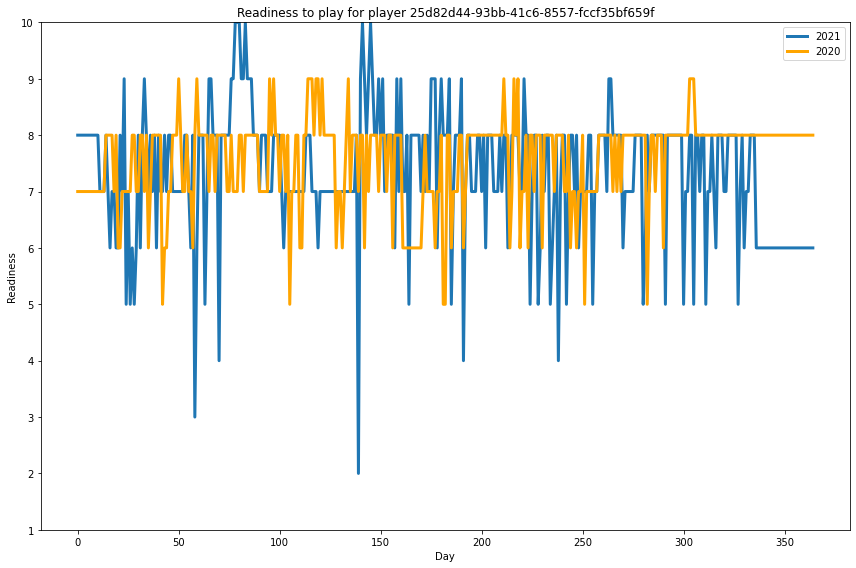

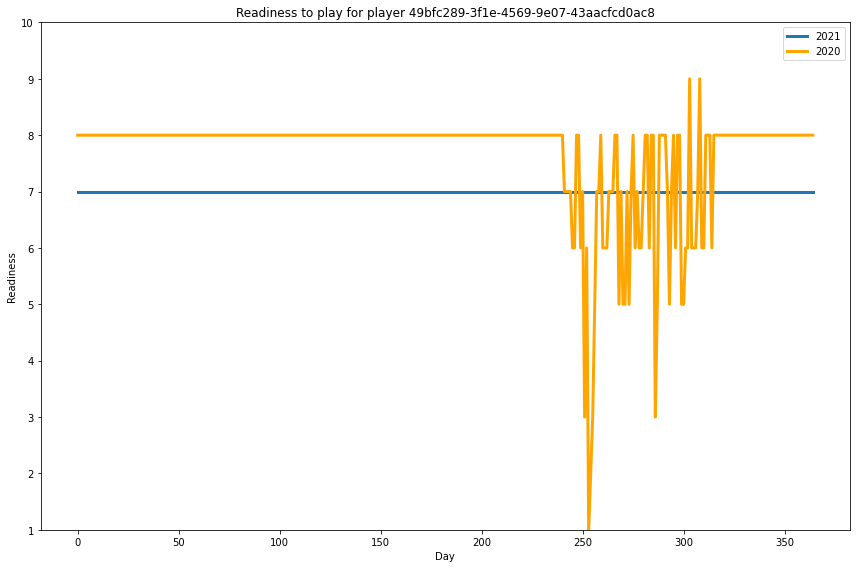

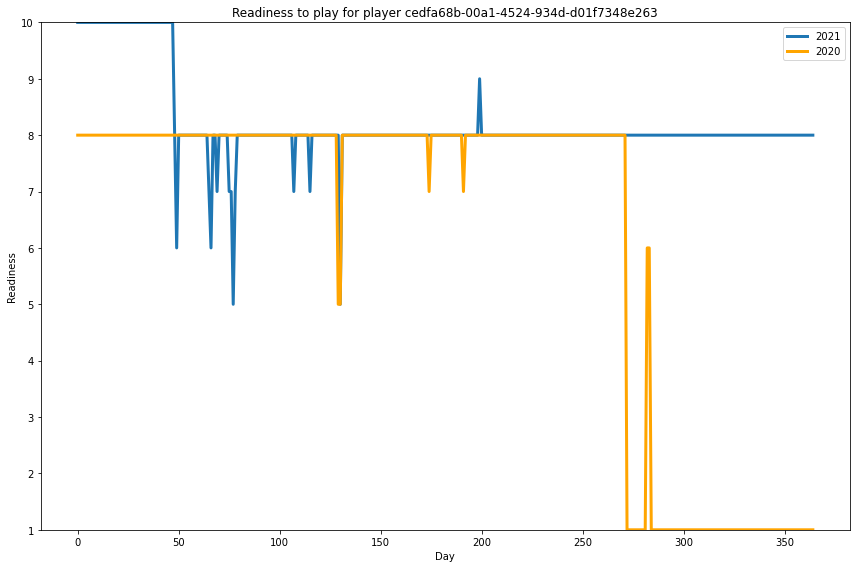

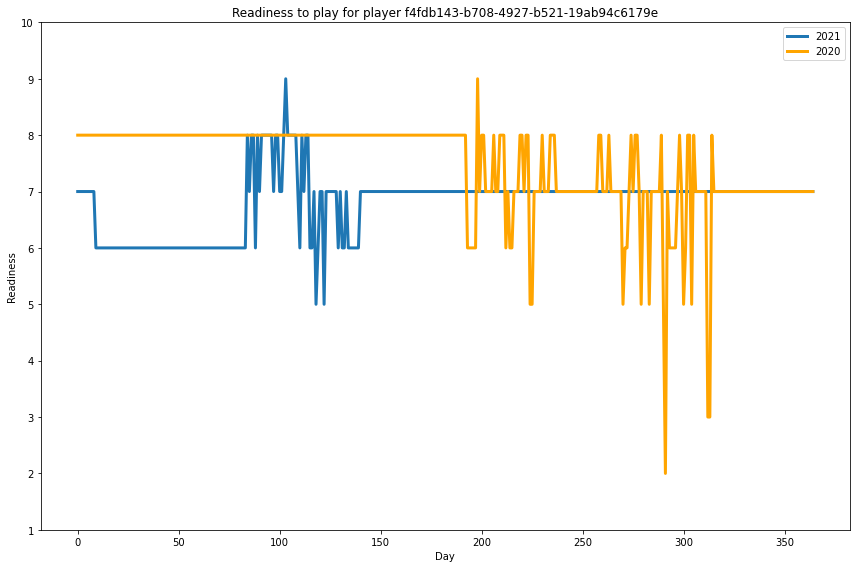

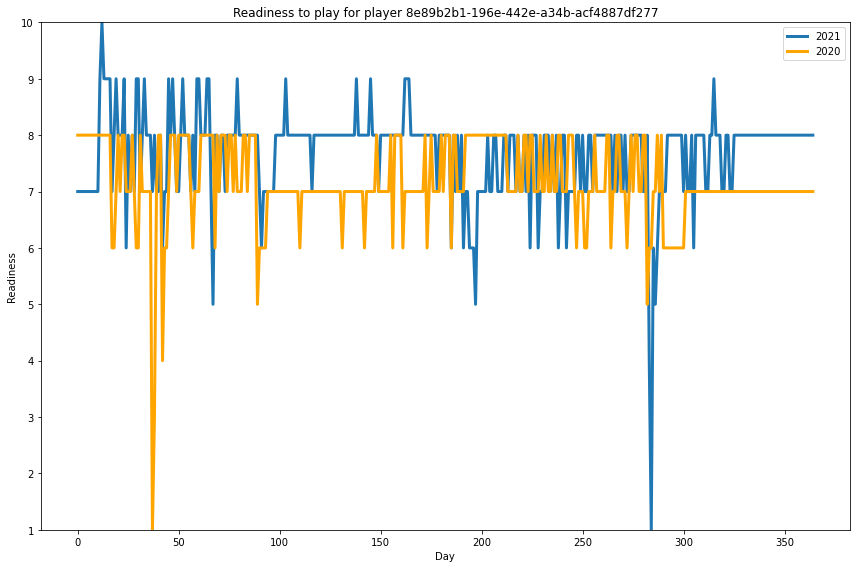

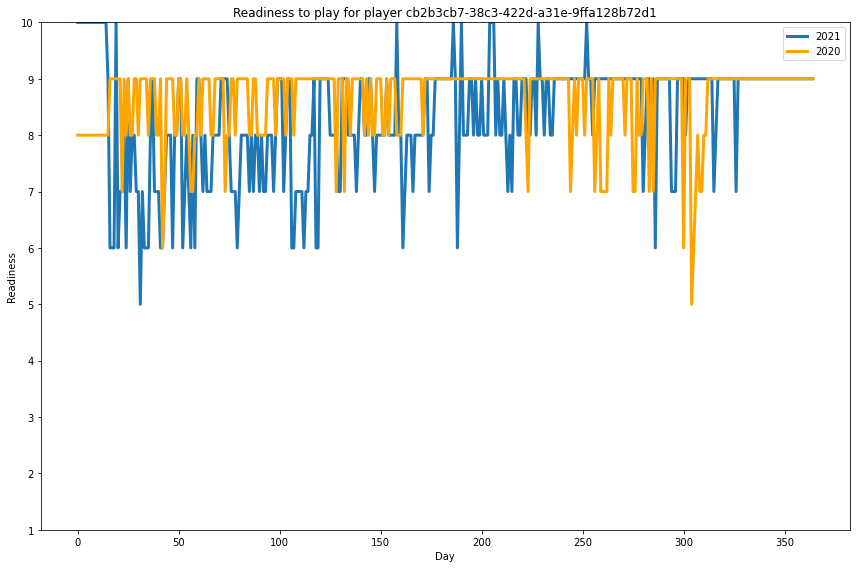

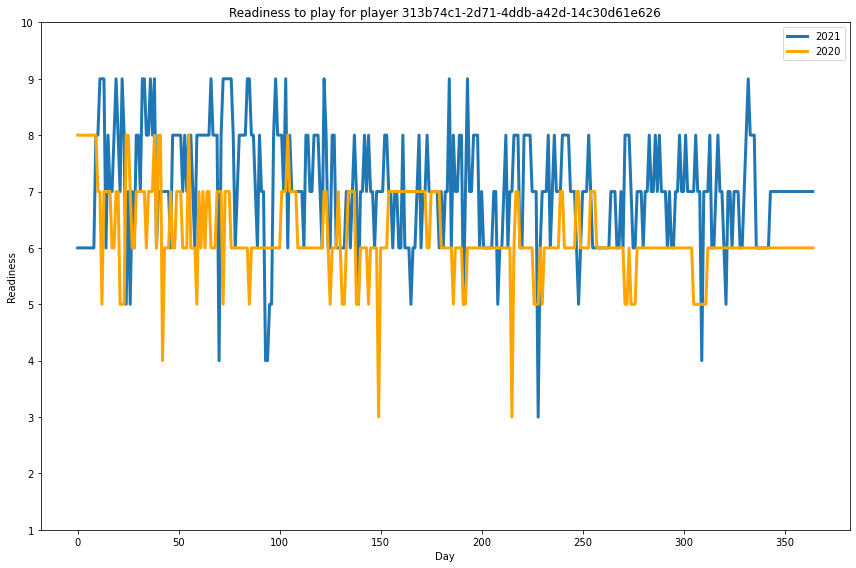

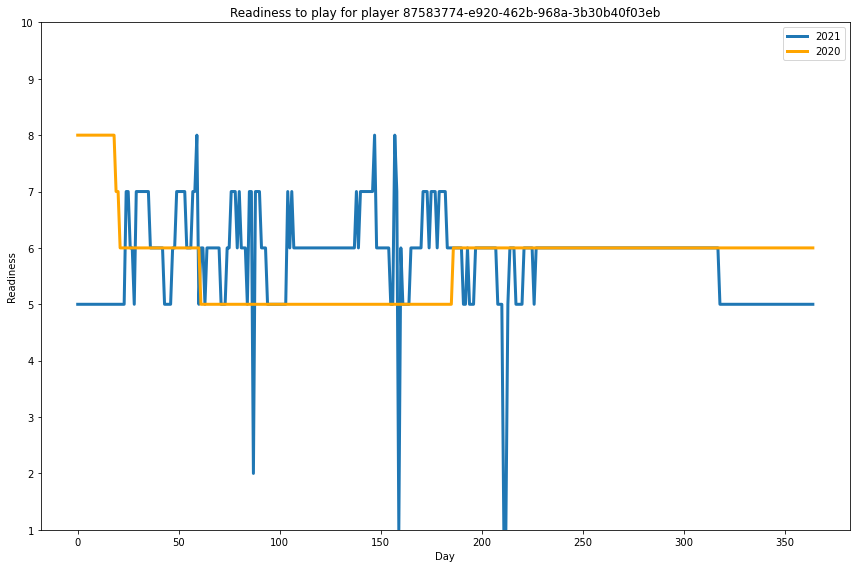

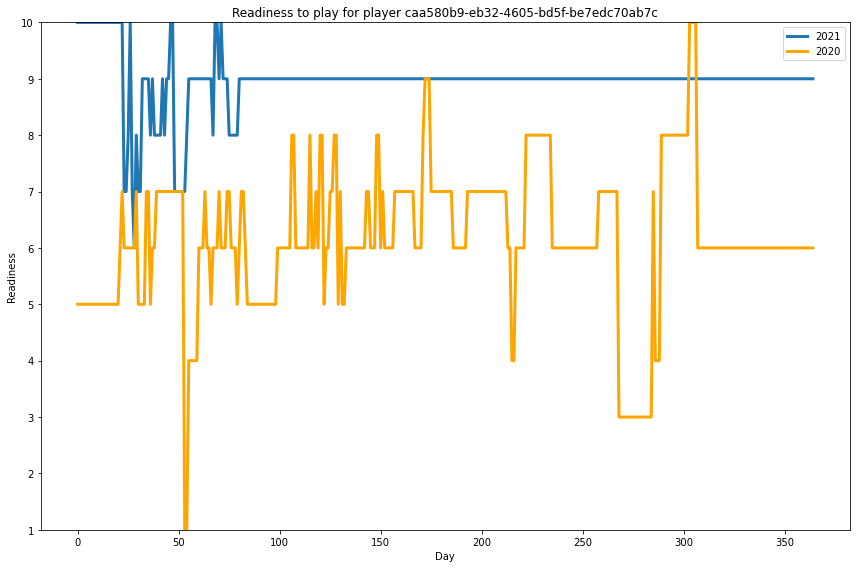

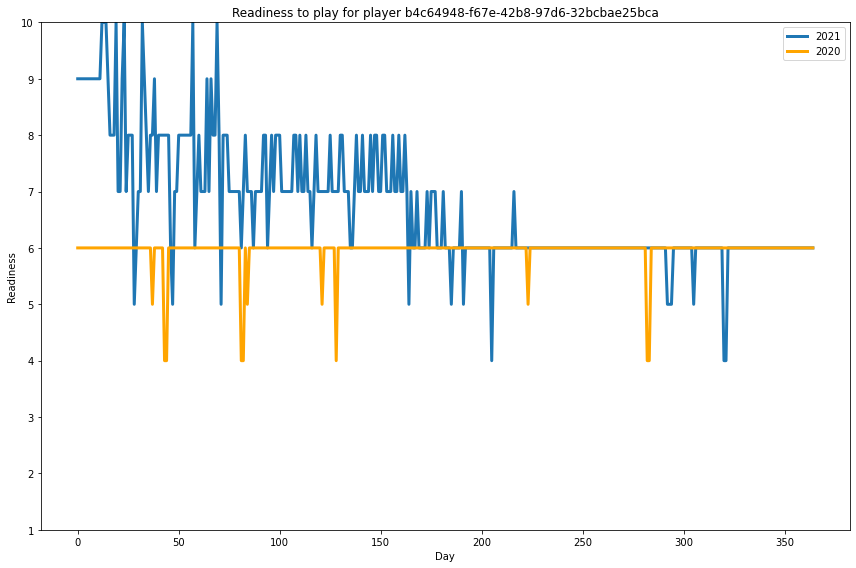

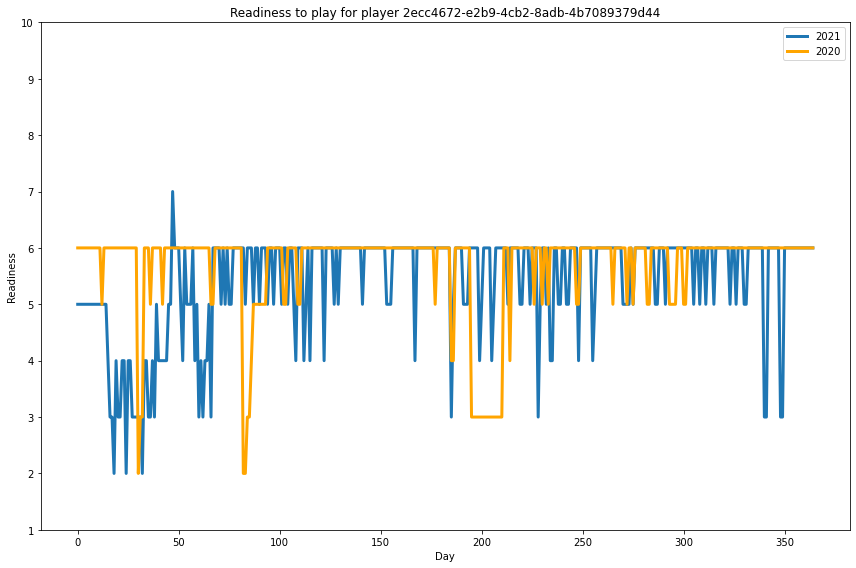

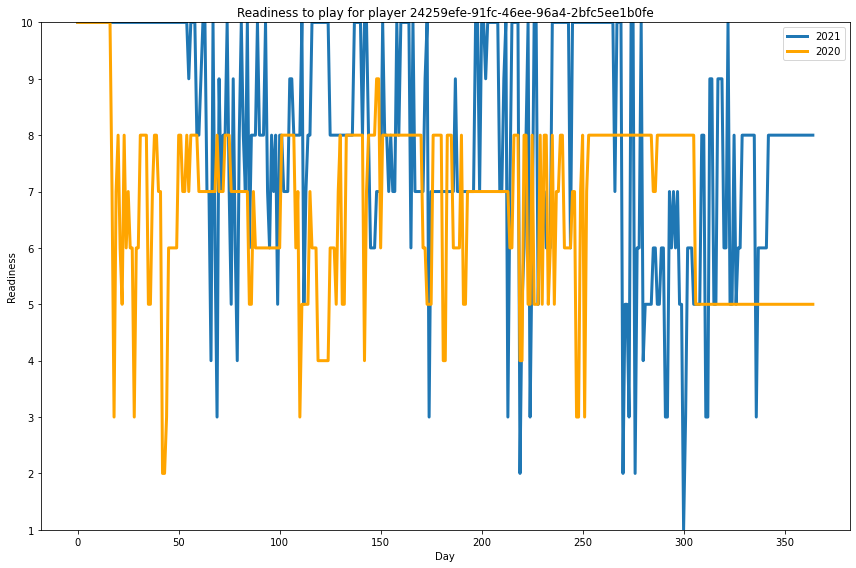

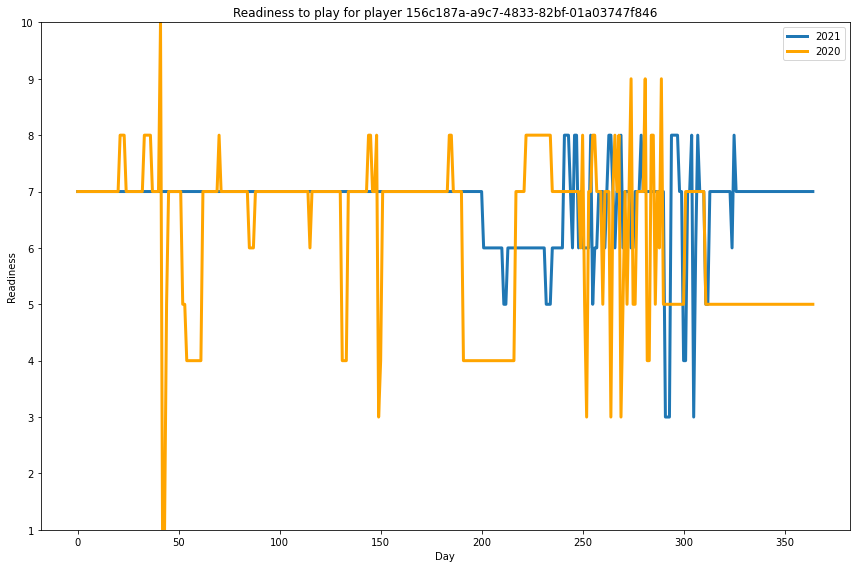

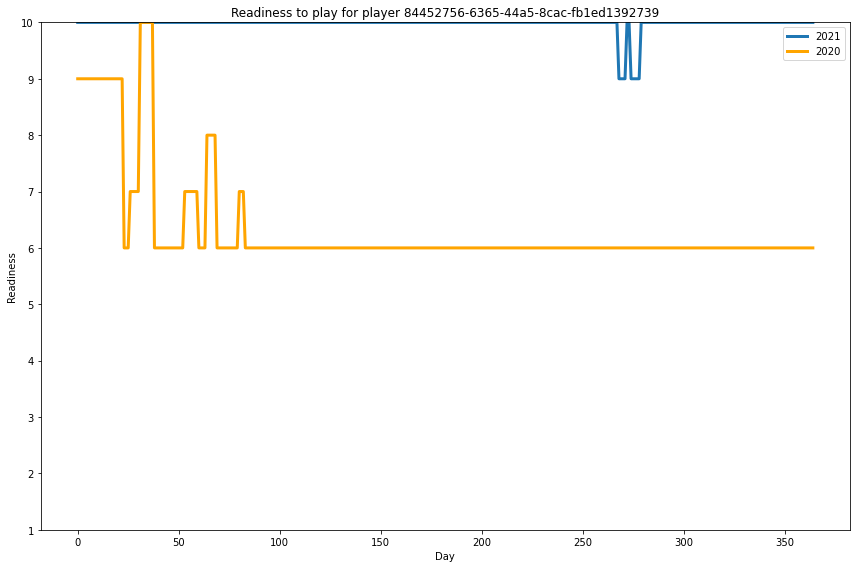

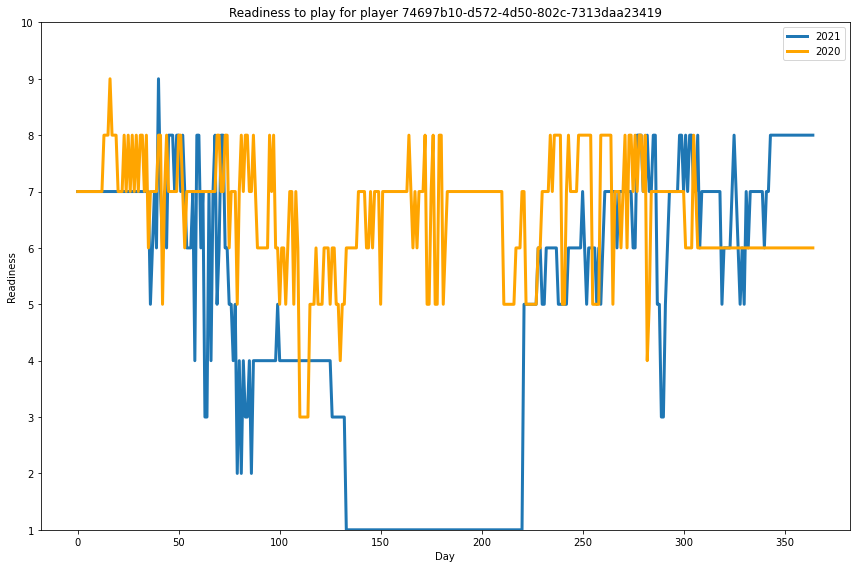

In [6]:
players_a = []
plot_team(players_a, df_a_2020, df_a_2021)

## Plot Team B

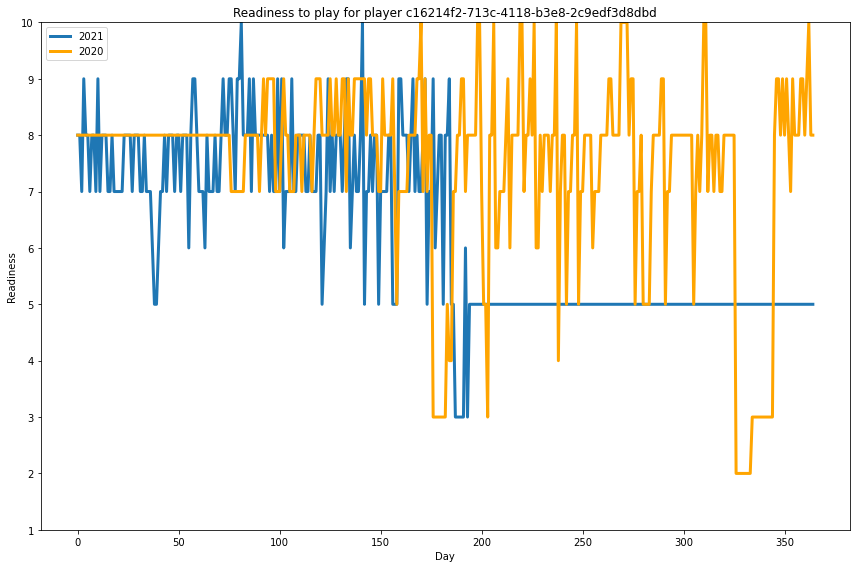

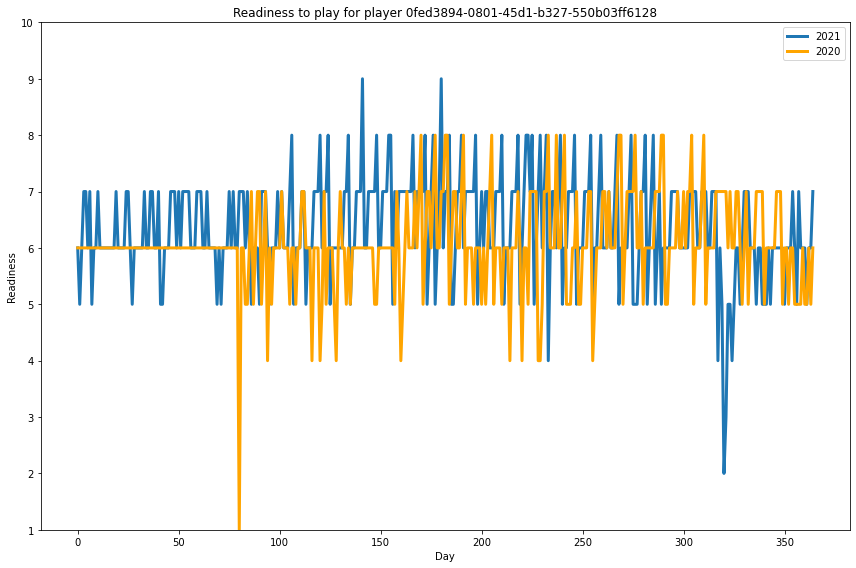

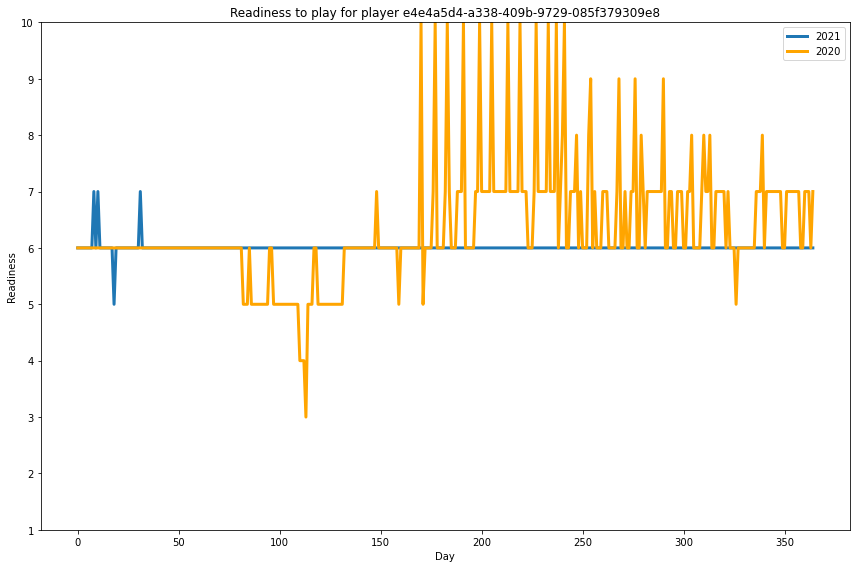

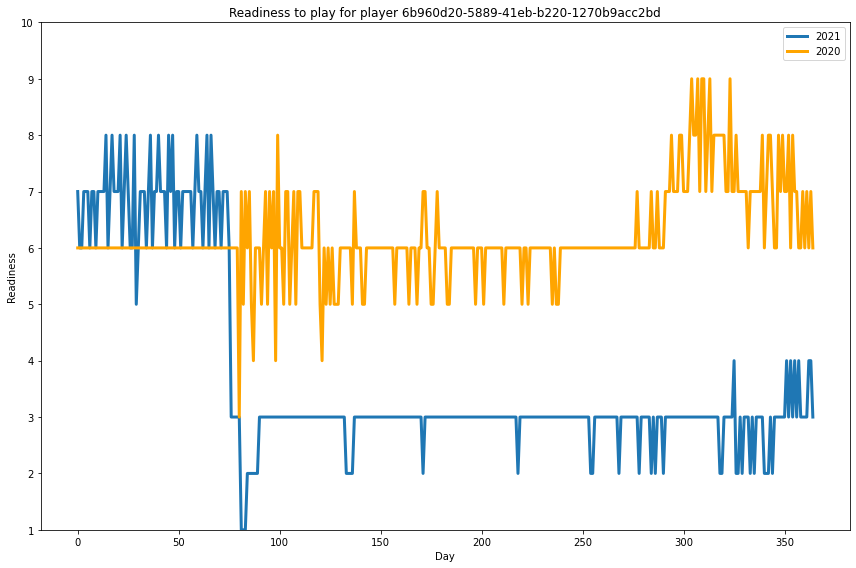

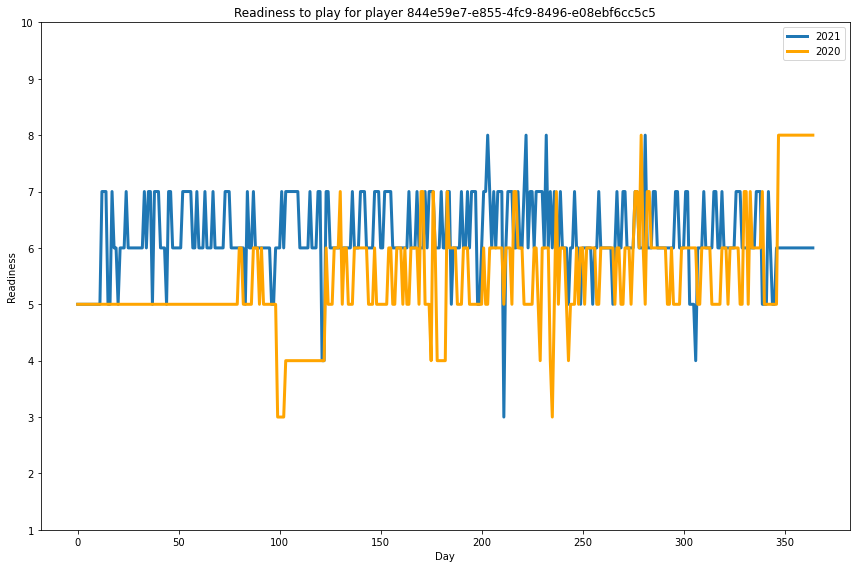

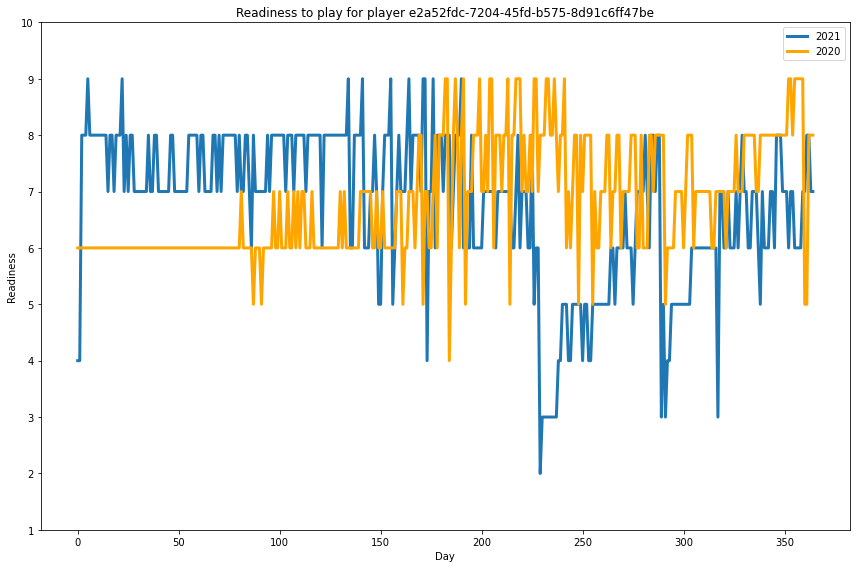

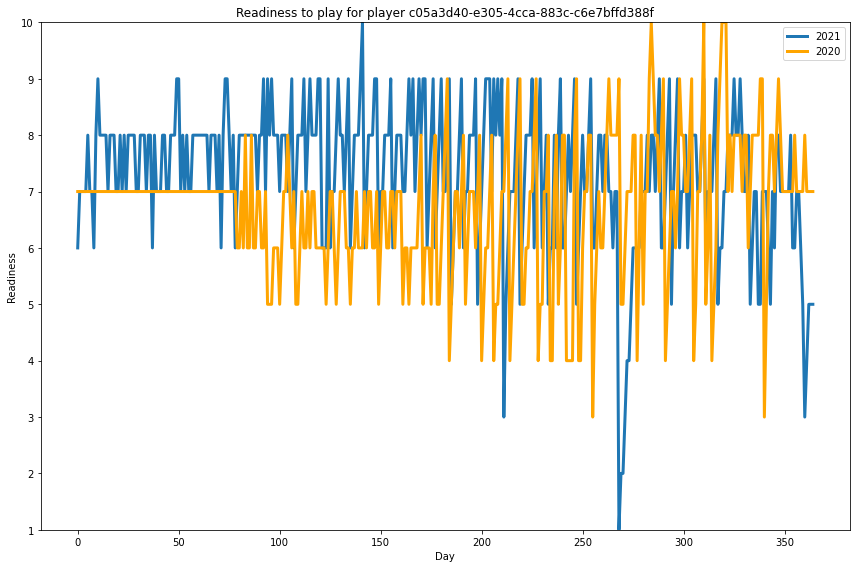

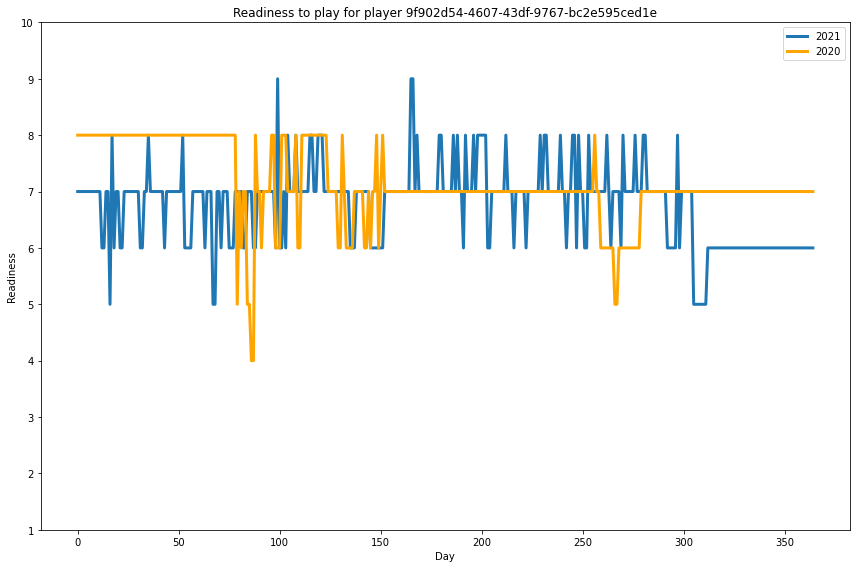

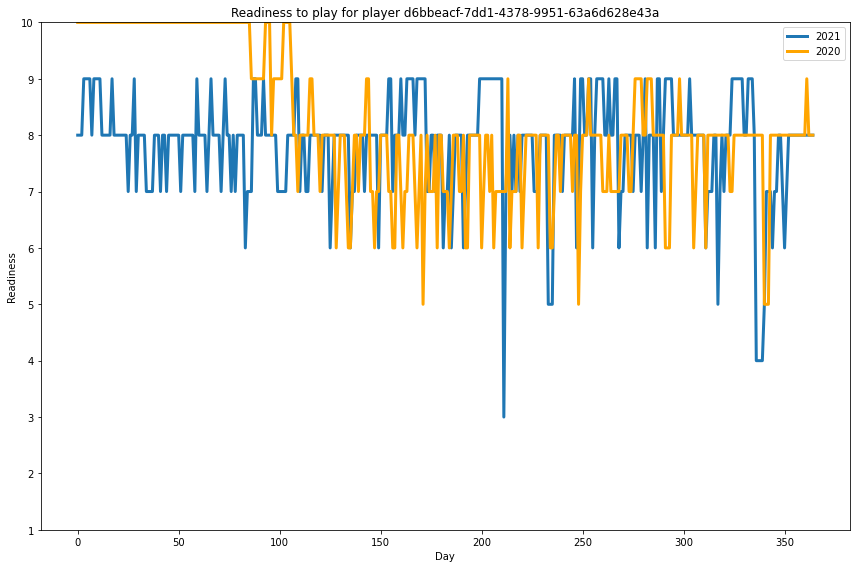

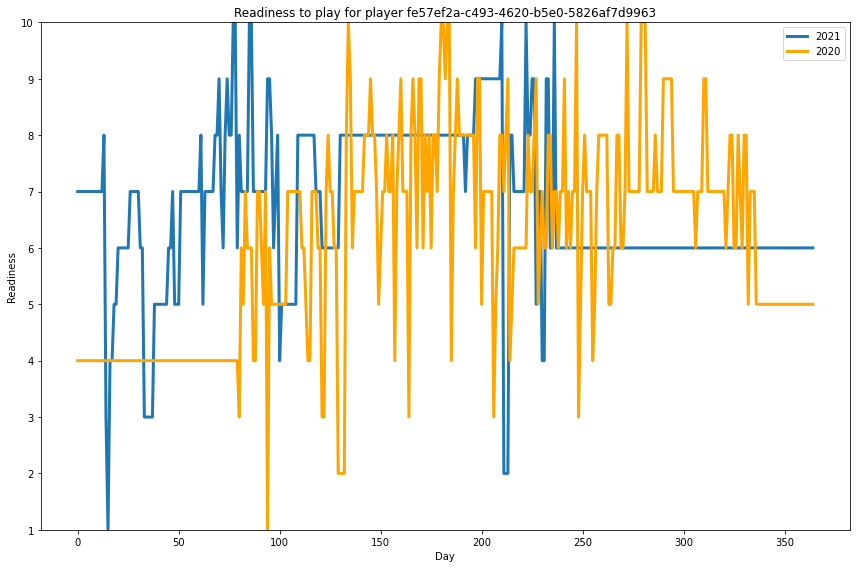

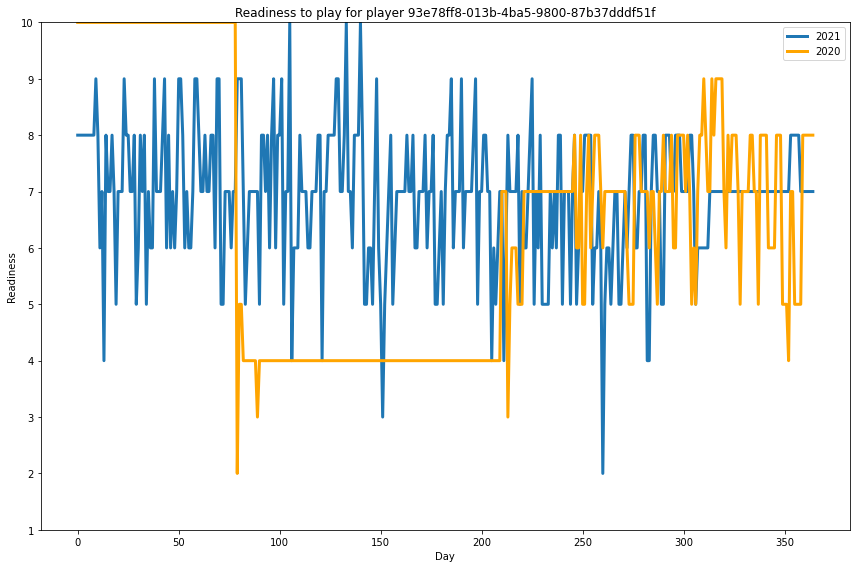

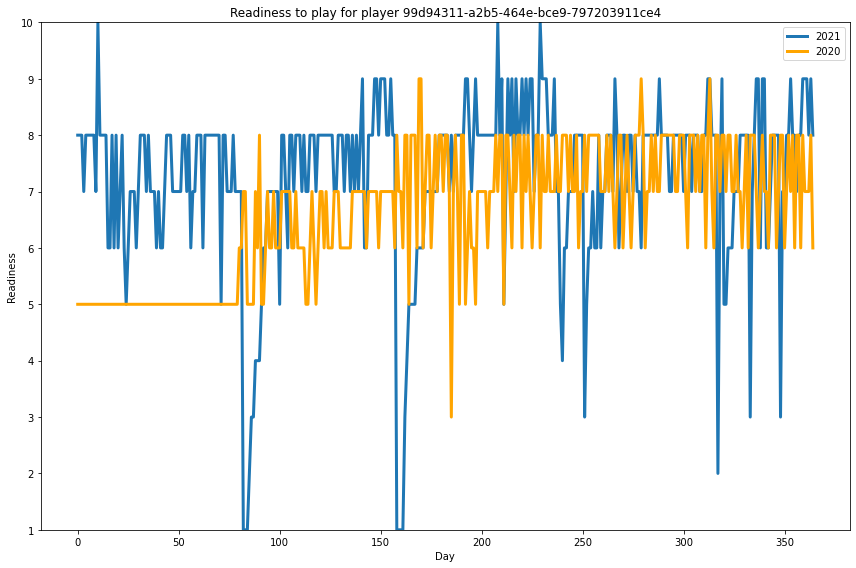

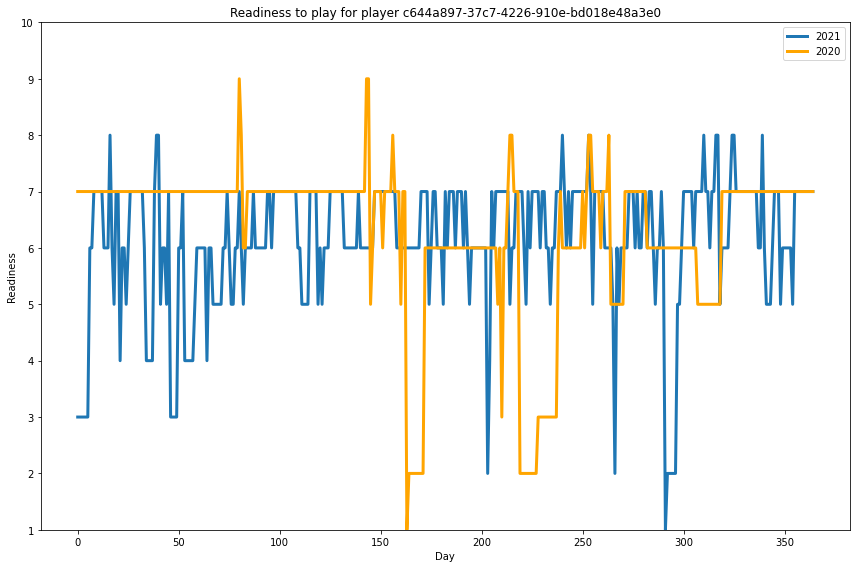

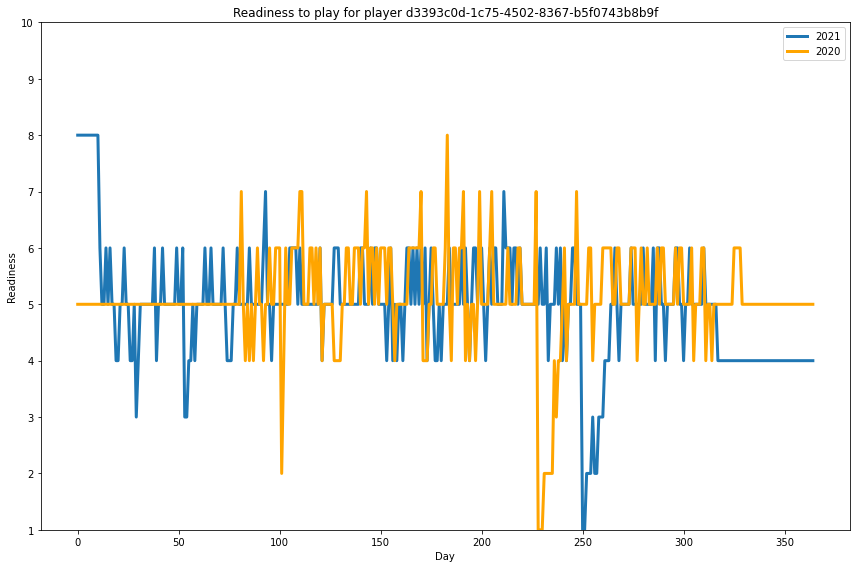

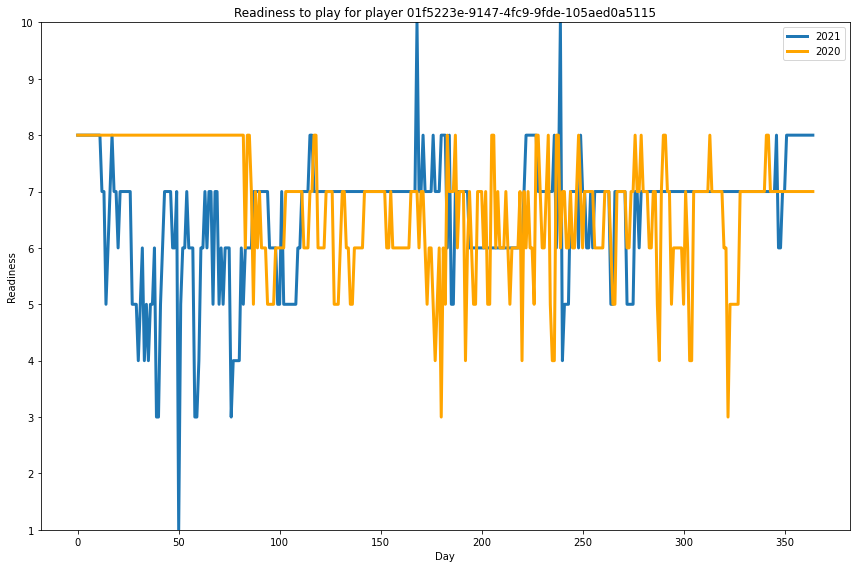

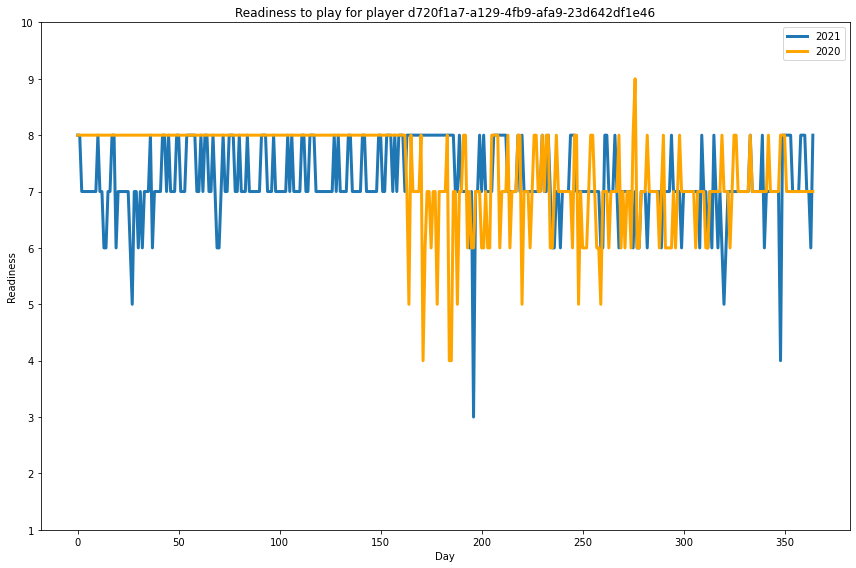

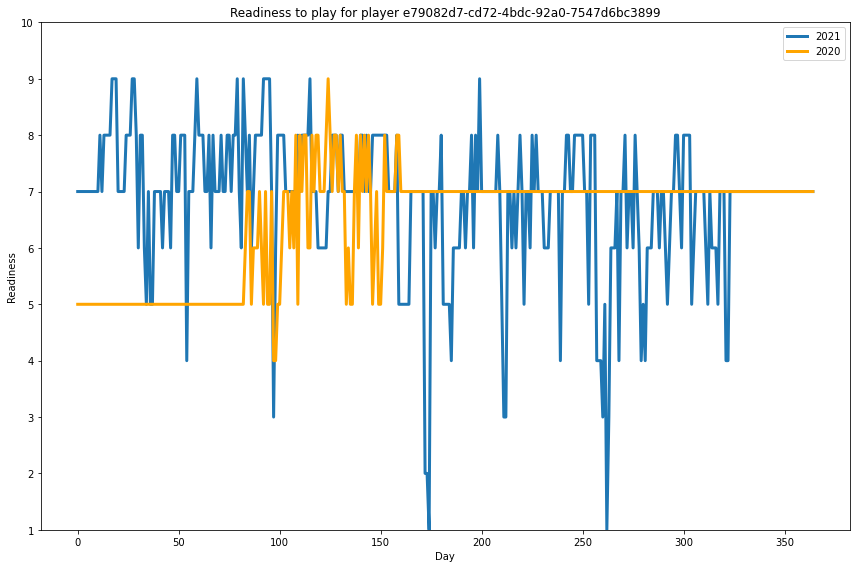

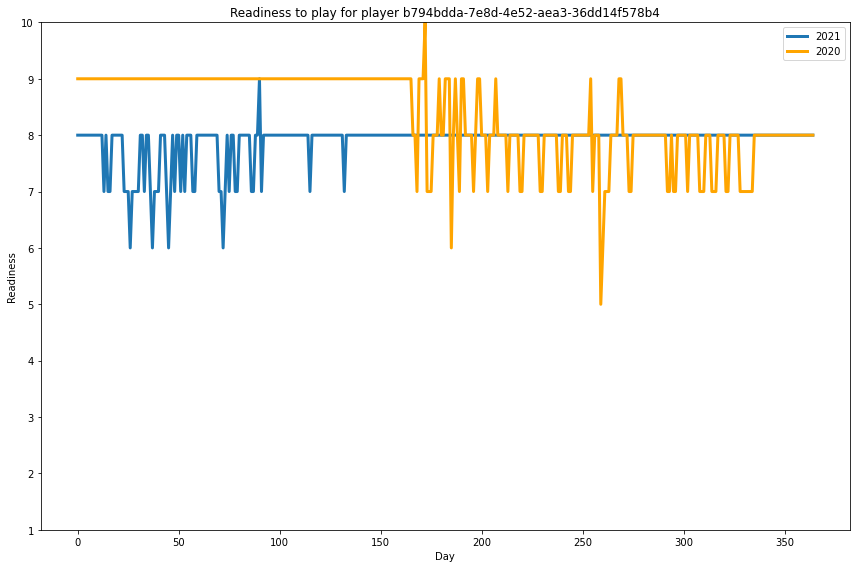

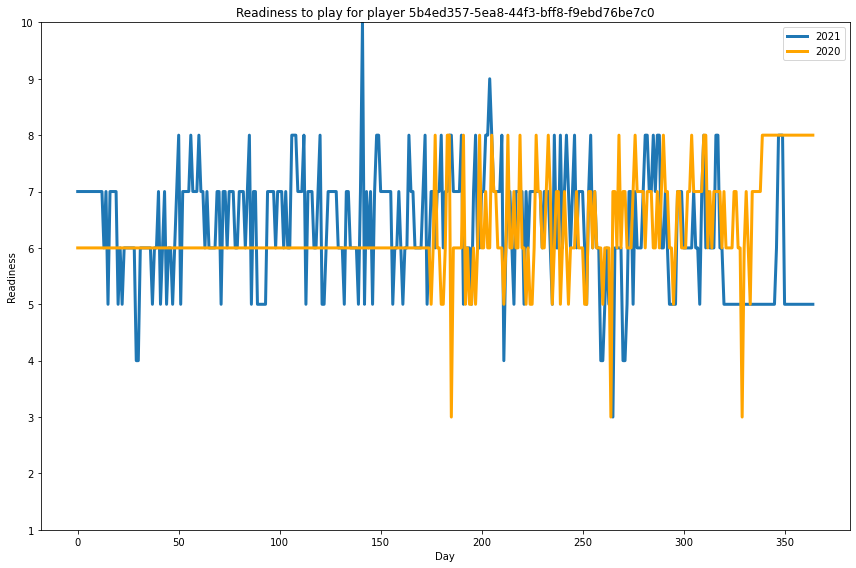

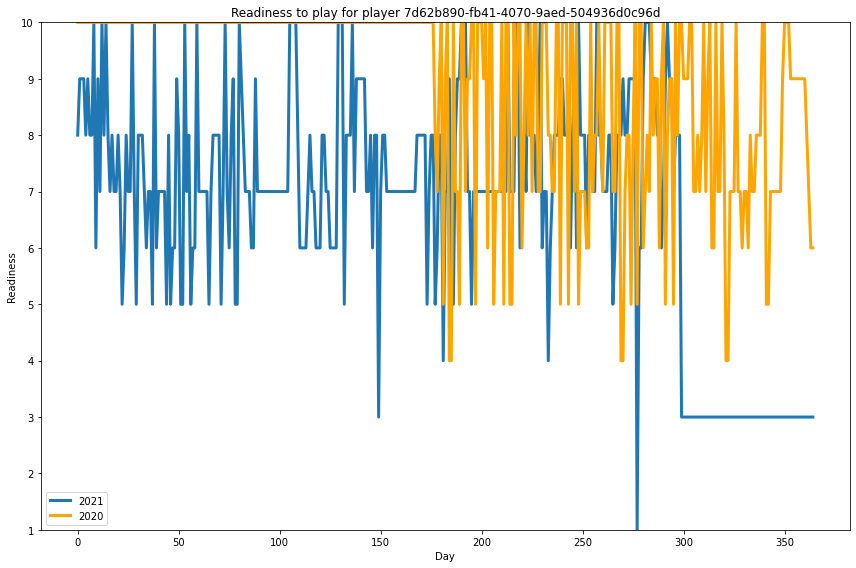

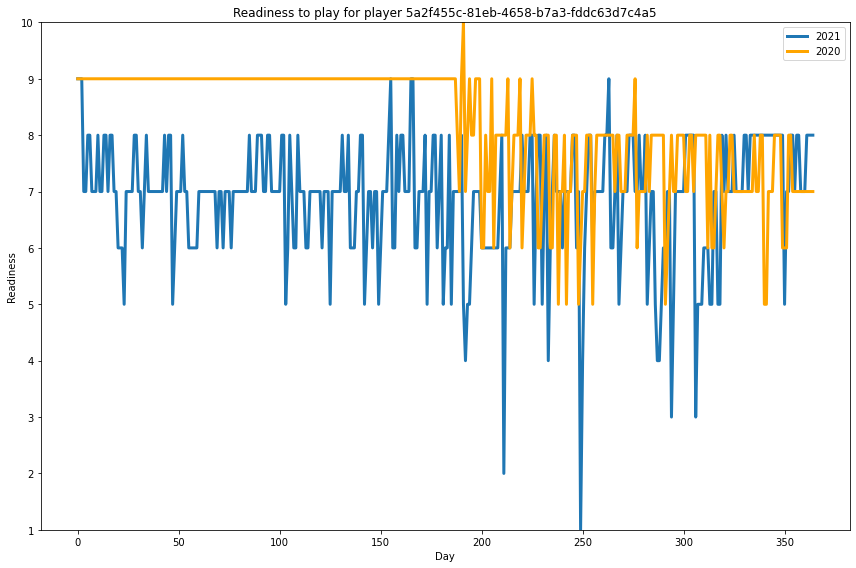

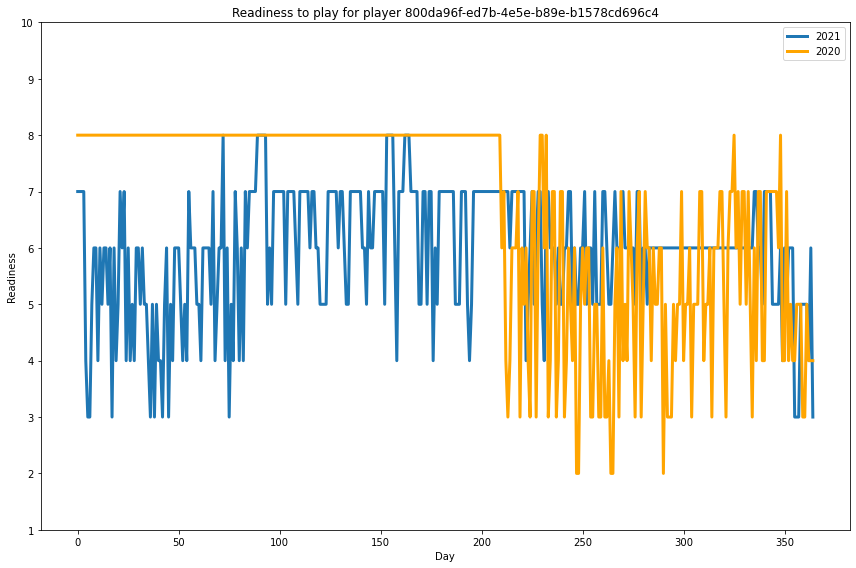

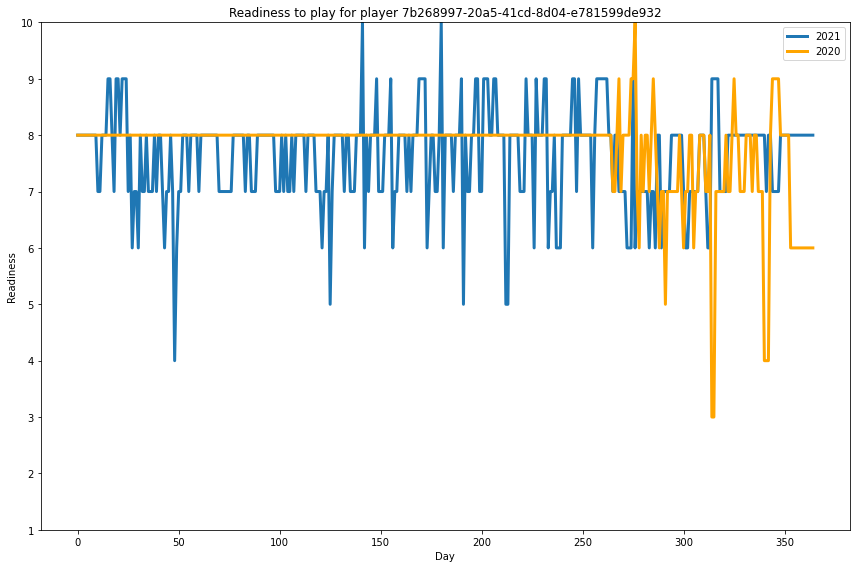

In [7]:
players_b = []
plot_team(players_b, df_b_2020, df_b_2021)